# Flights Data Exploration
## by Daiki Kudo

## Preliminary Wrangling

> This dataset containing infomation of each flight data in 2008.

In [106]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import timeit
import glob
pd.set_option('display.max_columns', 500)

%matplotlib inline

In [48]:
# load in the dataset into pandas dataframe
df = pd.DataFrame()

for file in glob.glob("data/*.csv"):
    start = timeit.timeit()
        
    f_df = pd.read_csv(file, engine='python')
    df = pd.concat([df, f_df])
        
    end = timeit.timeit()
    print(file, df.shape, end - start)

KeyboardInterrupt: 

In [50]:
# load in the dataset into pandas dataframe
df = pd.read_csv("data/2008.csv")

In [142]:
# high-level overview of data shape and composition
print(df.shape)
print(df.info(null_counts=True))
df.head()

(6855025, 30)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6855025 entries, 0 to 7009727
Data columns (total 30 columns):
Year                 6855025 non-null int64
Month                6855025 non-null int64
DayofMonth           6855025 non-null int64
DayOfWeek            6855025 non-null int64
DepTime              6855025 non-null float64
CRSDepTime           6855025 non-null int64
ArrTime              6855025 non-null float64
CRSArrTime           6855025 non-null int64
UniqueCarrier        6855025 non-null object
FlightNum            6855025 non-null int64
TailNum              6855020 non-null object
ActualElapsedTime    6855025 non-null float64
CRSElapsedTime       6855025 non-null float64
AirTime              6855025 non-null float64
ArrDelay             6855025 non-null float64
DepDelay             6855025 non-null float64
Origin               6855025 non-null object
Dest                 6855025 non-null object
Distance             6855025 non-null int64
TaxiIn             

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,date
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-01-03
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-01-03
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-01-03
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,88.0,90.0,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-01-03
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0,2008-01-03


> Ther are some points I have to take care in this data.
* DepTime, CRSDepTime, ArrTime, CRSArrTime are not timestamp.

In [81]:
print(df.duplicated().sum())
df = df.drop_duplicates()

In [ ]:
>

In [108]:
# merge Year, Month, and DayofMonth columns into a timestamp column named "date"

df["date"] = df.Year * 10000 + df.Month * 100 + df.DayofMonth
df.date = pd.to_datetime(df.date,format='%Y%m%d')
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,date
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-01-03
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-01-03
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-01-03
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,88.0,90.0,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-01-03
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0,2008-01-03


In [107]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7009724.0,7.009724e+06,7.009724e+06,7.009724e+06,6.873478e+06,7.009724e+06,6.858075e+06,7.009724e+06,7.009724e+06,6.855025e+06,7.008880e+06,6.855025e+06,6.855025e+06,6.873478e+06,7.009724e+06,6.858075e+06,6.872666e+06,7.009724e+06,7.009724e+06,1.524733e+06,1.524733e+06,1.524733e+06,1.524733e+06,1.524733e+06
mean,2008.0,6.375132e+00,1.572801e+01,3.924181e+00,1.333830e+03,1.326086e+03,1.481258e+03,1.494801e+03,2.224201e+03,1.273224e+02,1.288668e+02,1.040186e+02,8.168445e+00,9.972565e+00,7.263868e+02,6.860851e+00,1.645305e+01,1.960619e-02,2.463007e-03,1.577205e+01,3.039035e+00,1.716462e+01,7.497444e-02,2.077101e+01
std,0.0,3.406736e+00,8.797066e+00,1.988260e+00,4.780689e+02,4.642509e+02,5.052251e+02,4.826728e+02,1.961716e+03,7.018731e+01,6.940974e+01,6.743979e+01,3.850194e+01,3.531127e+01,5.621018e+02,4.933651e+00,1.133280e+01,1.386427e-01,4.956754e-02,4.009913e+01,1.950289e+01,3.189497e+01,1.837941e+00,3.925965e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,-1.410000e+02,0.000000e+00,-5.190000e+02,-5.340000e+02,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,9.280000e+02,9.250000e+02,1.107000e+03,1.115000e+03,6.220000e+02,7.700000e+01,8.000000e+01,5.500000e+01,-1.000000e+01,-4.000000e+00,3.250000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.325000e+03,1.320000e+03,1.512000e+03,1.517000e+03,1.571000e+03,1.100000e+02,1.100000e+02,8.600000e+01,-2.000000e+00,-1.000000e+00,5.810000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.728000e+03,1.715000e+03,1.909000e+03,1.907000e+03,3.518000e+03,1.570000e+02,1.590000e+02,1.320000e+02,1.200000e+01,8.000000e+00,9.540000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,2.100000e+01,0.000000e+00,2.600000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.743000e+03,1.379000e+03,1.435000e+03,1.350000e+03,2.461000e+03,2.467000e+03,4.962000e+03,3.080000e+02,4.290000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


### What is the structure of your dataset?

> There are 7009728 rows of flight data in the dataset with 29 features originally.  
> Variable descriptions 
>  
Name	Description
>  
1	Year	1987-2008  
2	Month	1-12  
3	DayofMonth	1-31  
4	DayOfWeek	1 (Monday) - 7 (Sunday)  
>  
5	DepTime	        actual departure time (local, hhmm)   
6	CRSDepTime	    scheduled departure time (local, hhmm)  
7	ArrTime	actual  arrival time (local, hhmm)    
8	CRSArrTime	    scheduled arrival time (local, hhmm)  
>  
9	UniqueCarrier	unique carrier code  
10	FlightNum	    flight number  
11	TailNum	        plane tail number  
>  
12	ActualElapsedTime	(actual)    in minutes  
13	CRSElapsedTime      (scheduled)	in minutes  
14	AirTime	in minutes 
>  
15	ArrDelay	(Difference in minutes between scheduled and actual arrival time)   
16	DepDelay	(Difference in minutes between scheduled and actual departure time. )    
>  
17	Origin	origin IATA airport code    
18	Dest	destination IATA airport code   
(Code assigned by IATA and commonly used to identify a carrier. As the same code may have been assigned to different carriers over time, the code is not always unique.)
>  
19	Distance	in miles 
>  
20	TaxiIn	taxi in time, in minutes  
21	TaxiOut	taxi out time, in minutes  
>  
22	Cancelled	        was the flight cancelled?  
23	CancellationCode	reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
24	Diverted            1 = yes, 0 = no  
25	CarrierDelay        in minutes  
26	WeatherDelay	    in minutes  
27	NASDelay	        (National Air System Delay) in minutes  
28	SecurityDelay	    in minutes  
29	LateAircraftDelay	in minutes  

### What is/are the main feature(s) of interest in your dataset?

>  
* What kind of features can be found in the flight delays which happened in 2008?
* What causes affect the longer delays?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
 
> * What kind of features can be found in the flight delays which happened in 2008?  
 (arrival delay = departure delay + elapsed time extension)  
 1. month, day of month, day of the week  
 - arrival delay = ArrDelay = ArrTime, CRSArrTime
 - departure delay = DepDelay = DepTime - CRSDepTime
 - elapsed time extension = ActualElapsedTime - CRSElapsedTime (= airtime + 10minutes?)  
 - Distance
>
>  
> * What causes can be associated with longer delays?
 - WeatherDelay, NAS Delay, SecurityDelay, LateAircraftDelay  

## Univariate Exploration

> In this section, I start by looking at the distrbution of main variables.

> First, number of flights in each day in 2008

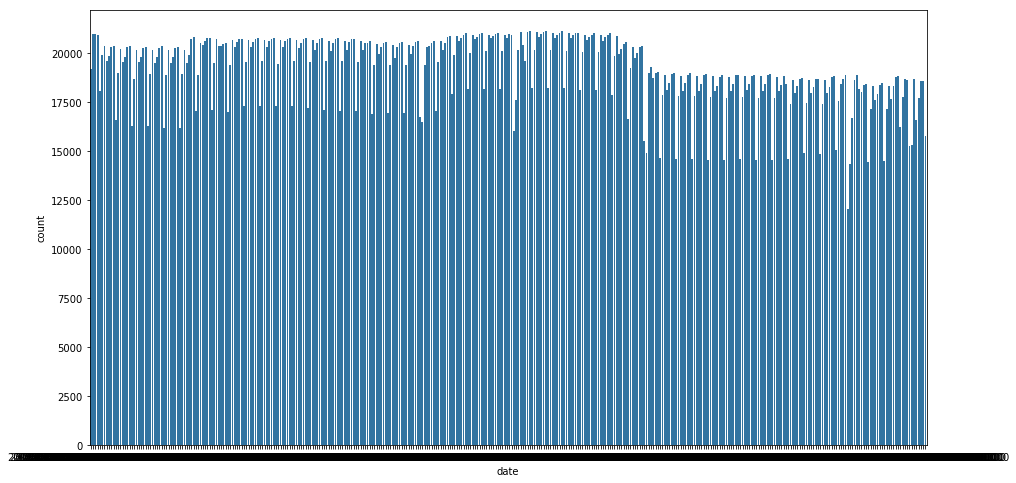

In [105]:
# date of the flight
plt.figure(figsize=[15,8])
#plt.xticks(rotation = 90)
sb.countplot(data=df, x="date", color=sb.color_palette()[0]);

> It seems like...

> Next, I take a look at 

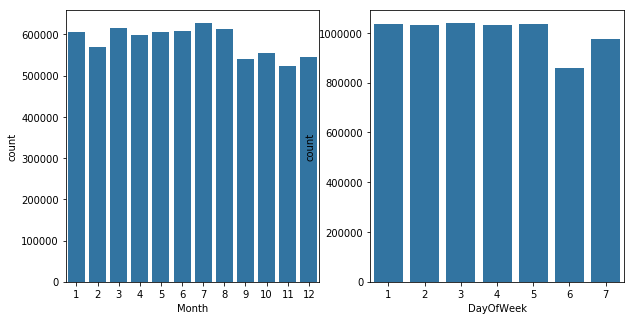

In [61]:
# months of the flight
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sb.countplot(data=df, x="Month", color=sb.color_palette()[0])
plt.subplot(1,2,2)
sb.countplot(data=df, x="DayOfWeek", color=sb.color_palette()[0])

> When I tried to make the histgrams of "ArrDelay", I couldn't because of null values. I pick up and take a look at them.

In [126]:
# check the rows whose ArrTime is none
df[df["ArrDelay"].isnull()]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,date
178,2008,1,3,4,NaN,700,NaN,830,WN,126,NaN,NaN,90.0,NaN,NaN,NaN,LAS,OAK,407,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN,2008-01-03
373,2008,1,3,4,NaN,1100,NaN,1215,WN,1146,NaN,NaN,75.0,NaN,NaN,NaN,LAX,OAK,337,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN,2008-01-03
399,2008,1,3,4,NaN,905,NaN,1025,WN,469,NaN,NaN,80.0,NaN,NaN,NaN,LAX,SFO,337,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN,2008-01-03
401,2008,1,3,4,NaN,1620,NaN,1740,WN,618,NaN,NaN,80.0,NaN,NaN,NaN,LAX,SFO,337,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN,2008-01-03
415,2008,1,3,4,NaN,1930,NaN,2035,WN,2528,NaN,NaN,65.0,NaN,NaN,NaN,LAX,SJC,308,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN,2008-01-03
676,2008,1,3,4,NaN,845,NaN,1140,WN,437,NaN,NaN,115.0,NaN,NaN,NaN,MDW,BDL,777,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN,2008-01-03
686,2008,1,3,4,NaN,1925,NaN,2045,WN,934,NaN,NaN,80.0,NaN,NaN,NaN,MDW,BNA,395,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN,2008-01-03
727,2008,1,3,4,NaN,600,NaN,805,WN,3326,NaN,NaN,65.0,NaN,NaN,NaN,MDW,DTW,229,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN,2008-01-03
881,2008,1,3,4,NaN,1110,NaN,1215,WN,1402,NaN,NaN,65.0,NaN,NaN,NaN,MDW,STL,251,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN,2008-01-03
884,2008,1,3,4,NaN,1445,NaN,1550,WN,2205,NaN,NaN,65.0,NaN,NaN,NaN,MDW,STL,251,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN,2008-01-03


> ArrDelay seems to have NaN when the flight is cancelled or diverted.  
In this analysis, I am focusing only on delay, so I will remove these rows of cancelled or diverted data.
Check there is not a row which has NaN in AirTime column even though it is neither cancelled nor diverted.

In [128]:
df = df[(df.Cancelled==0) & (df.Diverted==0)]

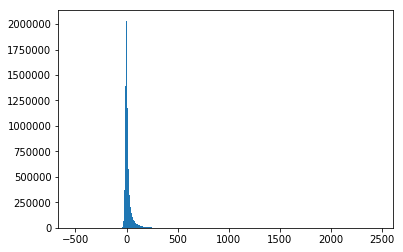

In [132]:
plt.hist(data=df, x="ArrDelay", bins=np.arange(df.ArrDelay.min(),df.ArrDelay.max()+10,10) );

> The initial plot of ArrDelay features show some immediate points of attention. There are spaces on the right and left of bins' gathering, suggesting some strong outliers. It's worth taking a look bit of time to identify these outliers and see if they need to be filtered out of the data.

In [144]:
df[(df.ArrDelay < -70)]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,date
158509,2008,1,14,1,1735.0,1735,2043.0,2155,OH,5203,N693CA,248.0,320.0,213.0,-72.0,0.0,JFK,AUS,1522,7.0,28.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-01-14
262274,2008,1,5,6,2249.0,2249,403.0,534,US,691,N803AW,194.0,285.0,174.0,-91.0,0.0,PHX,ATL,1587,10.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-01-05
374988,2008,1,25,5,909.0,920,1219.0,1330,HA,21,N584HA,310.0,370.0,287.0,-71.0,-11.0,SEA,HNL,2677,3.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-01-25
375112,2008,1,25,5,755.0,805,1049.0,1215,HA,27,N587HA,294.0,370.0,278.0,-86.0,-10.0,SEA,HNL,2677,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-01-25
417738,2008,1,19,6,1425.0,1430,1538.0,1650,MQ,4652,N703MR,73.0,140.0,63.0,-72.0,-5.0,RDU,EWR,416,4.0,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-01-19
477530,2008,1,14,1,1017.0,1030,1230.0,1350,AA,19,N325AA,313.0,380.0,296.0,-80.0,-13.0,JFK,LAX,2475,3.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-01-14
478481,2008,1,14,1,1816.0,1820,2034.0,2145,AA,127,N5CRAA,318.0,385.0,300.0,-71.0,-4.0,JFK,SAN,2446,2.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-01-14
526486,2008,1,5,6,1431.0,1530,1759.0,1910,AA,2318,N623AA,148.0,160.0,113.0,-71.0,-59.0,HDN,ORD,1009,9.0,26.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-01-05
533438,2008,1,9,3,847.0,900,1155.0,1310,AQ,485,N739AL,308.0,370.0,297.0,-75.0,-13.0,SNA,KOA,2530,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-01-09
761455,2008,2,24,7,1913.0,1915,2215.0,2334,OH,5203,N695CA,242.0,319.0,209.0,-79.0,-2.0,JFK,AUS,1522,11.0,22.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-02-24


In [139]:
df[(df.ArrDelay > 400)]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,date
8109,2008,1,5,6,2243.0,1415,45.0,1625,WN,1684,N347SW,62.0,70.0,41.0,500.0,508.0,SAN,PHX,304,2.0,19.0,0,NaN,0,66.0,0.0,0.0,0.0,434.0,2008-01-05
8254,2008,1,5,6,1940.0,1220,2111.0,1350,WN,1684,N347SW,91.0,90.0,64.0,441.0,440.0,SFO,SAN,447,5.0,22.0,0,NaN,0,269.0,0.0,1.0,0.0,171.0,2008-01-05
91196,2008,1,31,4,2225.0,1600,2351.0,1610,WN,689,N732SW,146.0,70.0,65.0,461.0,385.0,CMH,MDW,284,28.0,53.0,0,NaN,0,0.0,0.0,124.0,0.0,337.0,2008-01-31
92477,2008,1,31,4,46.0,1920,328.0,2045,WN,2633,N323SW,162.0,85.0,64.0,403.0,326.0,MDW,MCI,405,6.0,92.0,0,NaN,0,34.0,0.0,77.0,0.0,292.0,2008-01-31
92511,2008,1,31,4,111.0,1635,351.0,1945,WN,440,N732SW,100.0,130.0,81.0,486.0,516.0,MDW,PHL,668,7.0,12.0,0,NaN,0,0.0,52.0,0.0,0.0,434.0,2008-01-31
94899,2008,1,14,1,2346.0,1610,18.0,1707,XE,148,N11192,92.0,117.0,79.0,431.0,456.0,ABQ,ONT,631,3.0,10.0,0,NaN,0,431.0,0.0,0.0,0.0,0.0,2008-01-14
95787,2008,1,5,6,2138.0,1405,2253.0,1530,XE,216,N11191,75.0,85.0,60.0,443.0,453.0,OKC,SAT,407,4.0,11.0,0,NaN,0,71.0,0.0,0.0,0.0,372.0,2008-01-05
97122,2008,1,16,3,1407.0,715,1736.0,1034,XE,400,N12552,149.0,139.0,133.0,422.0,412.0,SAN,BOI,749,8.0,8.0,0,NaN,0,412.0,0.0,10.0,0.0,0.0,2008-01-16
97153,2008,1,16,3,1801.0,1105,1912.0,1216,XE,401,N12552,131.0,131.0,99.0,416.0,416.0,BOI,SAN,749,8.0,24.0,0,NaN,0,0.0,0.0,0.0,0.0,416.0,2008-01-16
97326,2008,1,5,6,1605.0,1000,2145.0,1501,XE,407,N14203,220.0,181.0,159.0,404.0,365.0,SAN,OMA,1313,5.0,56.0,0,NaN,0,0.0,0.0,39.0,0.0,365.0,2008-01-05


What I hava

Text(0.5,0,'AirTime')

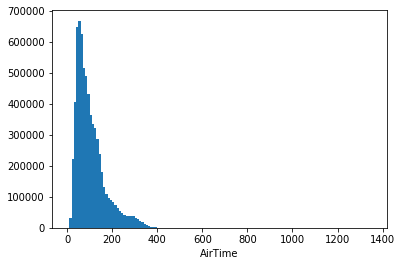

In [121]:
#Air time delayplt.
plt.hist(data=df[~df.AirTime.isnull()], x="AirTime", bins=np.arange(0, df.AirTime.max()+10, 10))
plt.xlabel("AirTime")

In [ ]:
df.AirTime > 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!